In [1]:
# Importing the dataset
dataset <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = TRUE ,
                sep = ',')

In [3]:
#checking overall dataset and coverting 'class' as factor variables 
str(dataset)
dataset$Class = as.factor(dataset$Class)
str(dataset$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [4]:
# Taking care of missing data
sum(is.na(dataset)) #no missing values found

[1] 0

In [5]:
#Excluding 'Time' variable from dataset for further analysis
dataset = dataset[,2:31]

In [6]:
#To overcome the imbalance in dataset I'll apply oversampling or undersampling
#Checking imbalance in the dataset
summary(dataset$Class)
prop.table(table(dataset$Class)) #99.8% proper transaction, 0.2% fraud. 

0      1 
284315    492


          0           1 
0.998272514 0.001727486 

In [7]:
# Feature Scaling for 'amount'
library(scales)
dataset[,29] = rescale(dataset[,29], to = c(0,1))
summary(dataset$Amount)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0002180 0.0008563 0.0034389 0.0030036 1.0000000 

In [14]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training = subset(dataset, split == TRUE)
test = subset(dataset, split == FALSE)
summary(training$Class)
summary(test$Class)

0      1 
227452    394

0     1 
56863    98

In [15]:
#install.packages("ROSE")
#Implementing undersampling
library(ROSE)
training = ovun.sample(Class~., data = training, method = 'under', 
                       N =2*394 , seed = 1234)$data
summary(training$Class)

0   1 
394 394

In [10]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training.new = subset(dataset, split == TRUE)
test.new = subset(dataset, split == FALSE)
summary(training.new$Class)
summary(test.new$Class)

0      1 
227452    394

0     1 
56863    98

In [12]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
training = ovun.sample(Class~., data = training.new, method = 'over', 
                       N =2*227452 , seed = 1234)$data
summary(training$Class)

0      1 
227452 227452


Call:
 randomForest(formula = Class ~ ., data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 6.22%
Confusion matrix:
    0   1 class.error
0 384  10  0.02538071
1  39 355  0.09898477


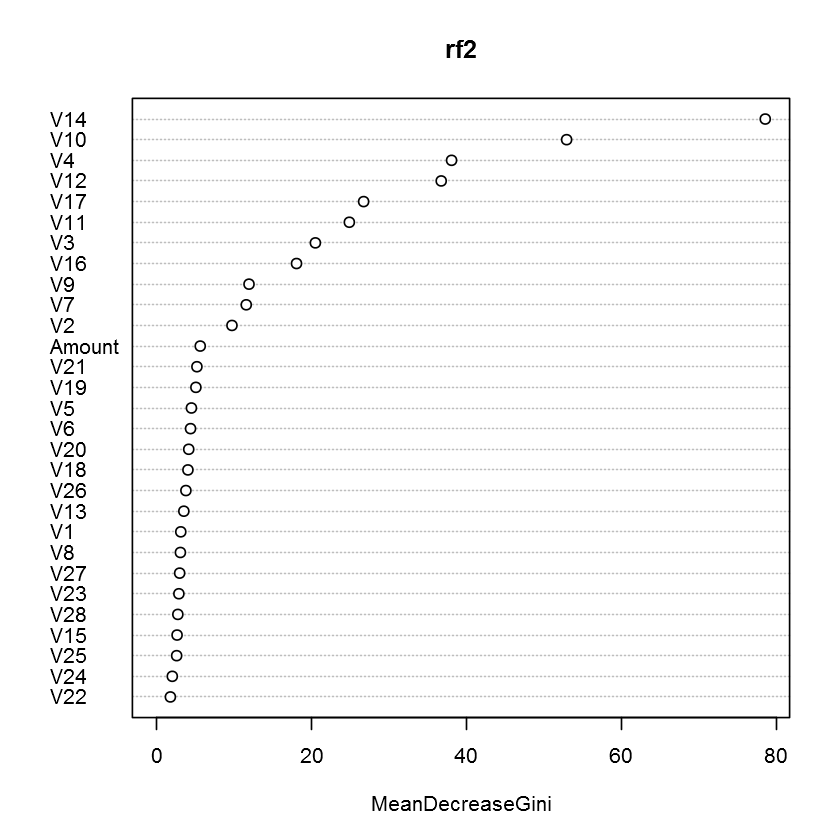

In [16]:
library(randomForest)
#head(training)
rf2 <-randomForest(Class ~.,data=training) 
print(rf2)
varImpPlot(rf2)


Call:
glm(formula = Class ~ V14 + V10 + V4 + V12, family = binomial, 
    data = training.new)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6434  -0.0307  -0.0235  -0.0186   4.5114  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.10825    0.11384 -71.224  < 2e-16 ***
V14         -0.66610    0.04439 -15.007  < 2e-16 ***
V10         -0.33270    0.05734  -5.802 6.55e-09 ***
V4           0.45400    0.04425  10.259  < 2e-16 ***
V12         -0.22806    0.05971  -3.819 0.000134 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5799.1  on 227845  degrees of freedom
Residual deviance: 1953.5  on 227841  degrees of freedom
AIC: 1963.5

Number of Fisher Scoring iterations: 10


[1] 0.5204082

[1] 0.9997538

,0,1
0,56849,47
1,14,51


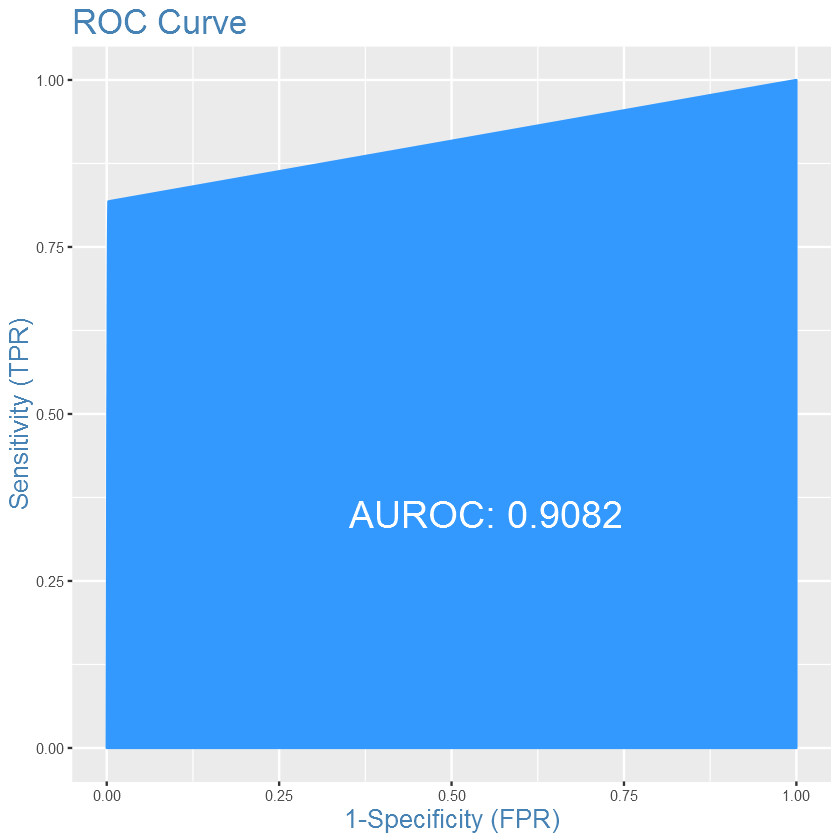

In [24]:
#logistic model

fit = glm(Class ~ V14+V10+V4+V12, data=training.new, family=binomial)
summary(fit)

library(InformationValue)
predicted <- predict(fit, test, type="response")  # predicted scores
#predicted
plotROC(test, predicted)


sensitivity(test$Class, predicted, threshold = 0.45)

specificity(test$Class, predicted, threshold = 0.45)


confusionMatrix(test$Class, predicted > 0.45)

In [63]:
training$Class = as.numeric(training$Class)
training.new$Class = as.numeric(training.new$Class)
rf123 <- training[c(1:30)]
rf124 <- training.new[c(1:30)]
co <- cor(rf123)
co1 <- cor(rf124)

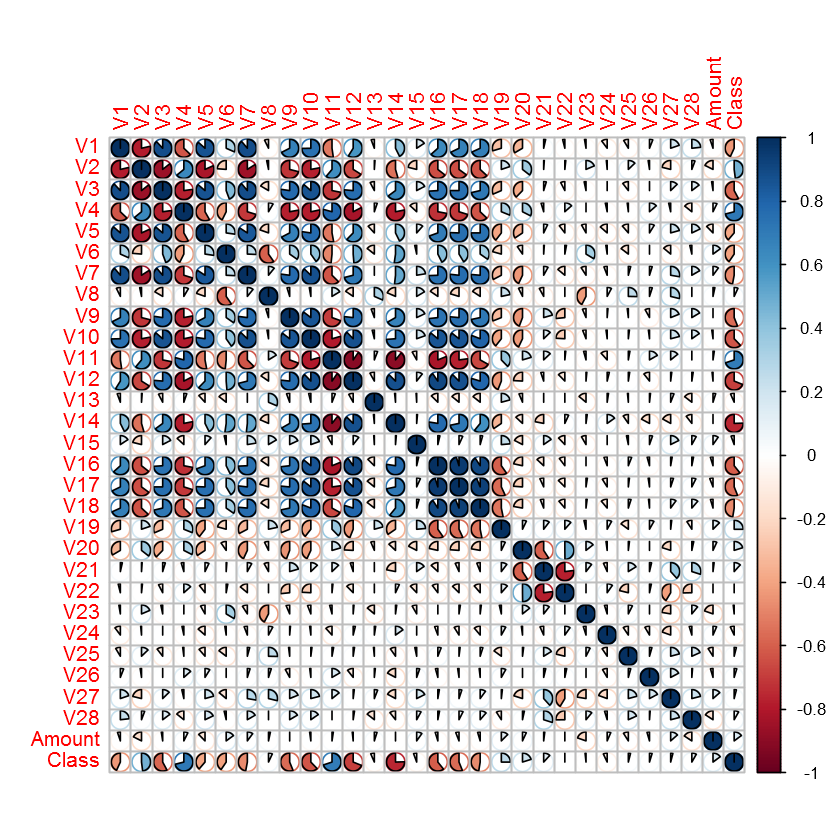

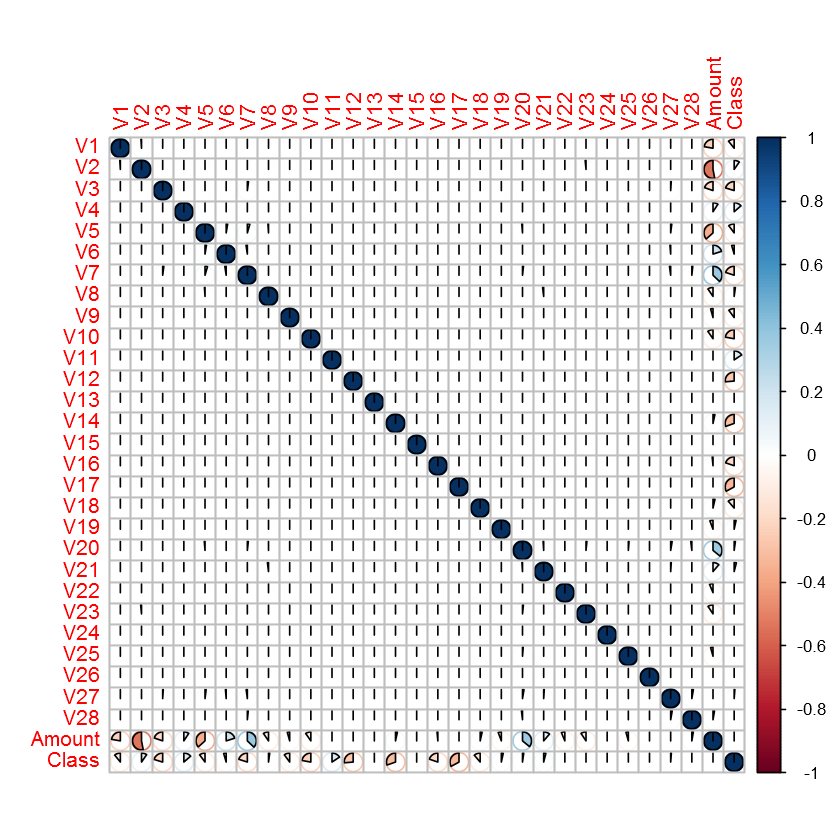

In [64]:
library(corrplot)
corrplot(co, method="pie")
corrplot(co1, method="pie")


Call:
glm(formula = Class ~ V14 + V8 + V13, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4457  -0.4197  -0.0119   0.0551   3.6120  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.28775    0.17651 -12.961  < 2e-16 ***
V14         -1.31301    0.11696 -11.226  < 2e-16 ***
V8          -0.12235    0.03856  -3.173  0.00151 ** 
V13         -0.31922    0.14532  -2.197  0.02804 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1092.40  on 787  degrees of freedom
Residual deviance:  336.98  on 784  degrees of freedom
AIC: 344.98

Number of Fisher Scoring iterations: 8


[1] 0.8979592

[1] 0.9585671

,0,1
0,54507,10
1,2356,88


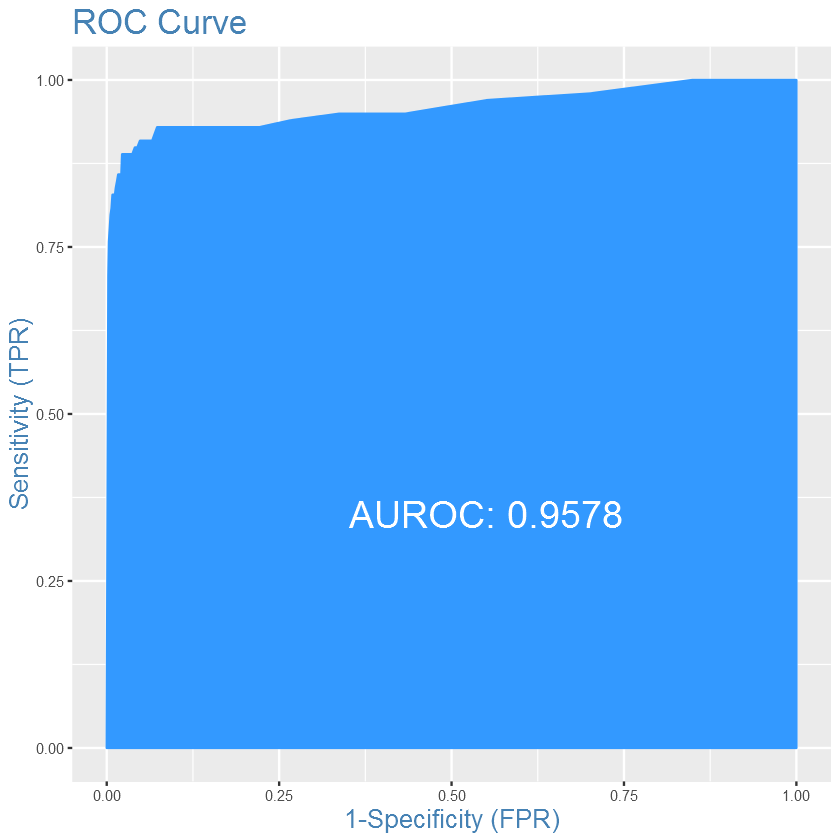

In [72]:
training$Class = as.factor(training$Class)
#logistic model

fit1 = glm(Class ~ V14+V8+V13, data=training, family=binomial)
summary(fit1)

library(InformationValue)
predicted1 <- predict(fit1, test, type="response")  # predicted scores
#predicted
plotROC(test, predicted1)


sensitivity(test$Class, predicted1, threshold = 0.45)

specificity(test$Class, predicted1, threshold = 0.45)


confusionMatrix(test$Class, predicted1 > 0.45)


Call:
glm(formula = Class ~ V10 + V12 + V14 + V4, family = binomial, 
    data = training.new)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6434  -0.0307  -0.0235  -0.0186   4.5114  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.10825    0.11384 -71.224  < 2e-16 ***
V10         -0.33270    0.05734  -5.802 6.55e-09 ***
V12         -0.22806    0.05971  -3.819 0.000134 ***
V14         -0.66610    0.04439 -15.007  < 2e-16 ***
V4           0.45400    0.04425  10.259  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5799.1  on 227845  degrees of freedom
Residual deviance: 1953.5  on 227841  degrees of freedom
AIC: 1963.5

Number of Fisher Scoring iterations: 10


[1] 0.5204082

[1] 0.9997538

,0,1
0,56855,48
1,8,50


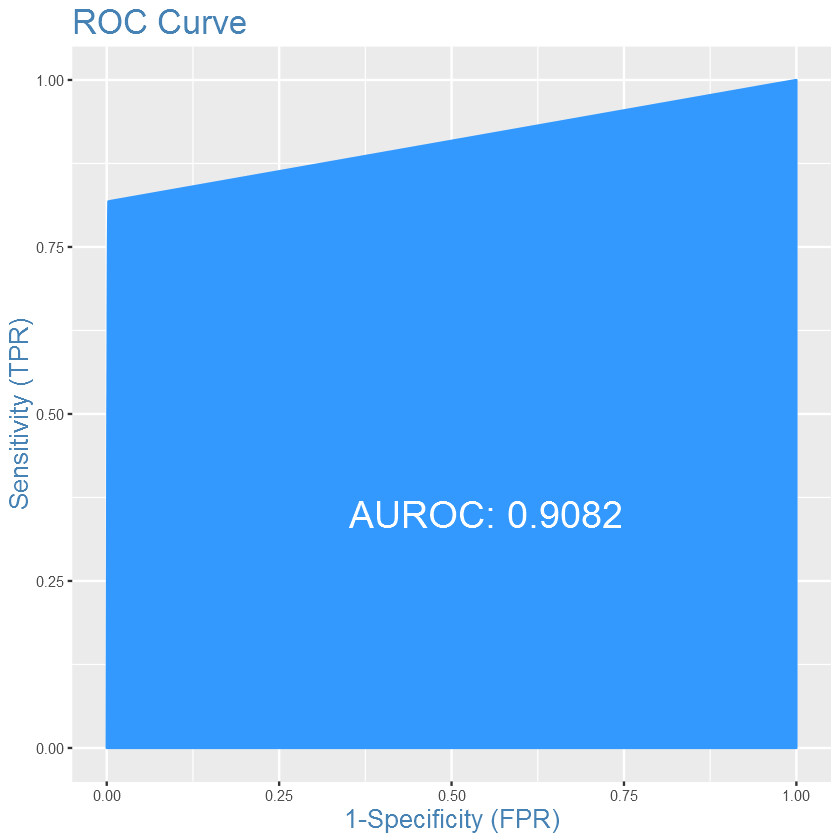

In [80]:
training.new$Class = as.factor(training.new$Class)
#logistic model

fit2 = glm(Class ~ V10+V12+V14+V4, data=training.new, family=binomial)
summary(fit2)

library(InformationValue)
predicted2 <- predict(fit2, test.new, type="response")  # predicted scores
#predicted
plotROC(test.new, predicted2)


sensitivity(test.new$Class, predicted2, threshold = 0.45)

specificity(test.new$Class, predicted2, threshold = 0.45)


confusionMatrix(test.new$Class, predicted2 > 0.5)

In [81]:
library("e1071")
classifier1 = svm(formula = Class~V14+V10+V4+V12, data = training,
                  type = 'C-classification',
                  kernel = 'radial')
classifier1


Call:
svm(formula = Class ~ V14 + V10 + V4 + V12, data = training, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  137


In [82]:
test_pred1 = predict(classifier1, type = 'response', newdata = training[,-30])
# Making Confusion Matrix
cm1 = table(training[,30], test_pred1)

cm1

   test_pred1
      1   2
  1 391   3
  2  44 350

In [107]:
classifier2 = svm(formula = Class~V14 + V17 + V10 + V12+V4, data = training.new,
                  type = 'C-classification',
                  kernel = 'linear')

In [108]:
test_pred2 = predict(classifier2, type = 'response', newdata = test.new[,-30])
# Making Confusion Matrix
cm2 = table(test.new[,30], test_pred2)

cm2

   test_pred2
        1     2
  0 56852    11
  1    28    70

In [130]:
classifier2



Call:
svm(formula = Class ~ V14 + V17 + V10 + V12 + V4, data = training.new, 
    type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.2 

Number of Support Vectors:  432


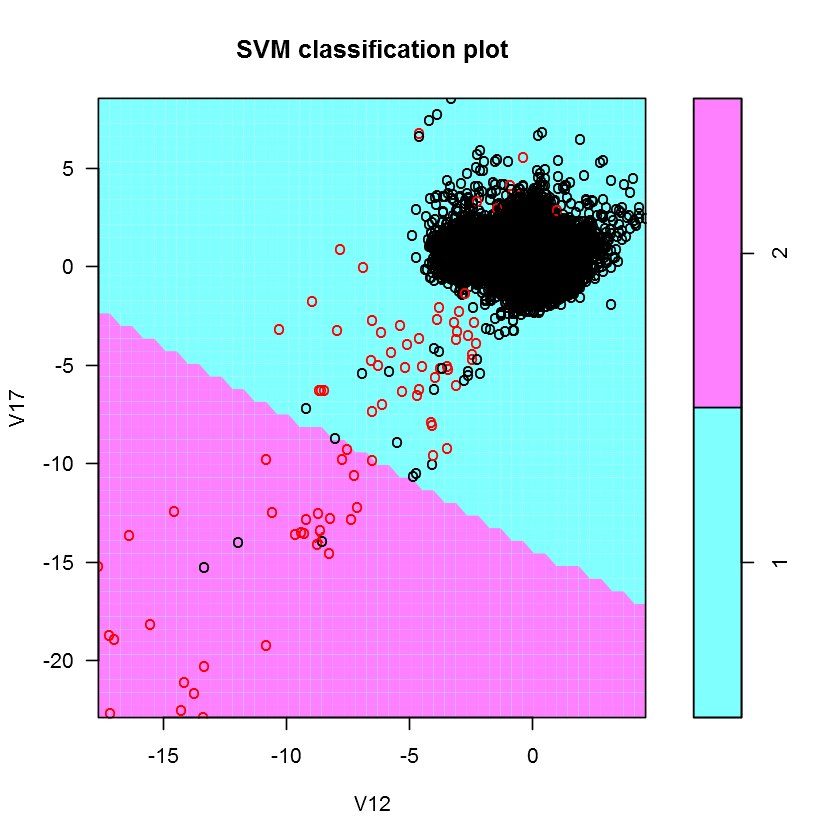

In [109]:
plot(classifier2, test.new, V17 ~ V12)

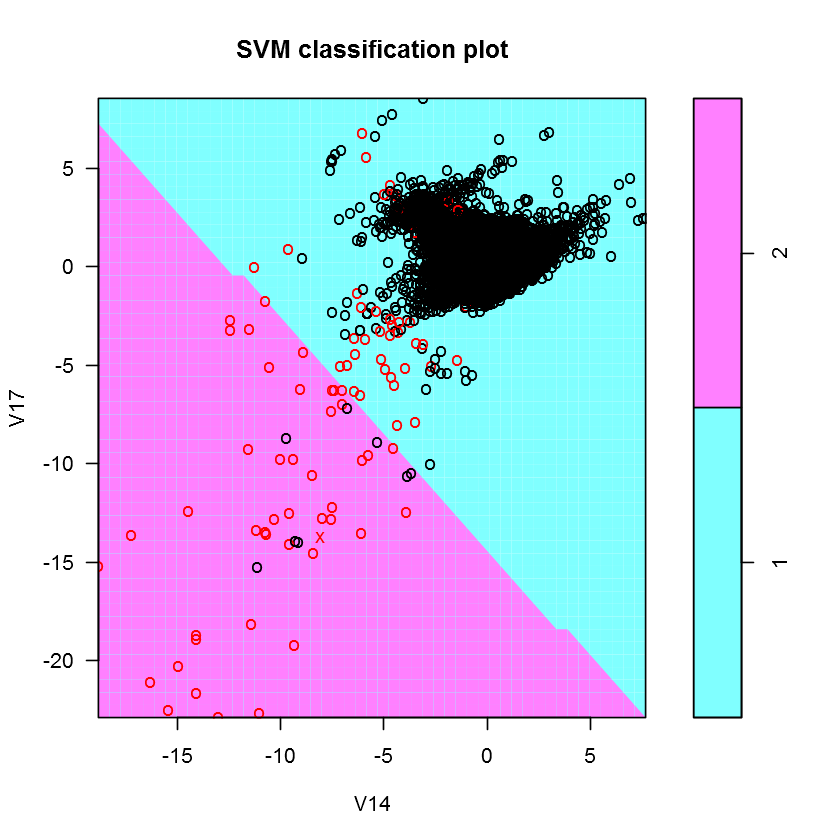

In [110]:
plot(classifier2, test.new, V17 ~ V14)

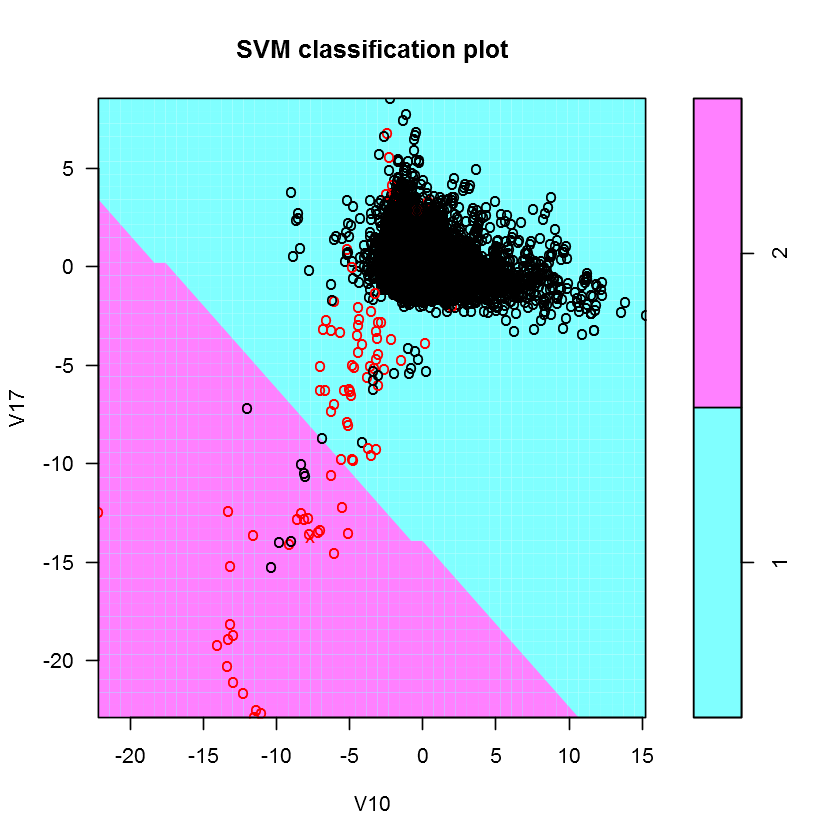

In [111]:
plot(classifier2, test.new, V17 ~ V10)

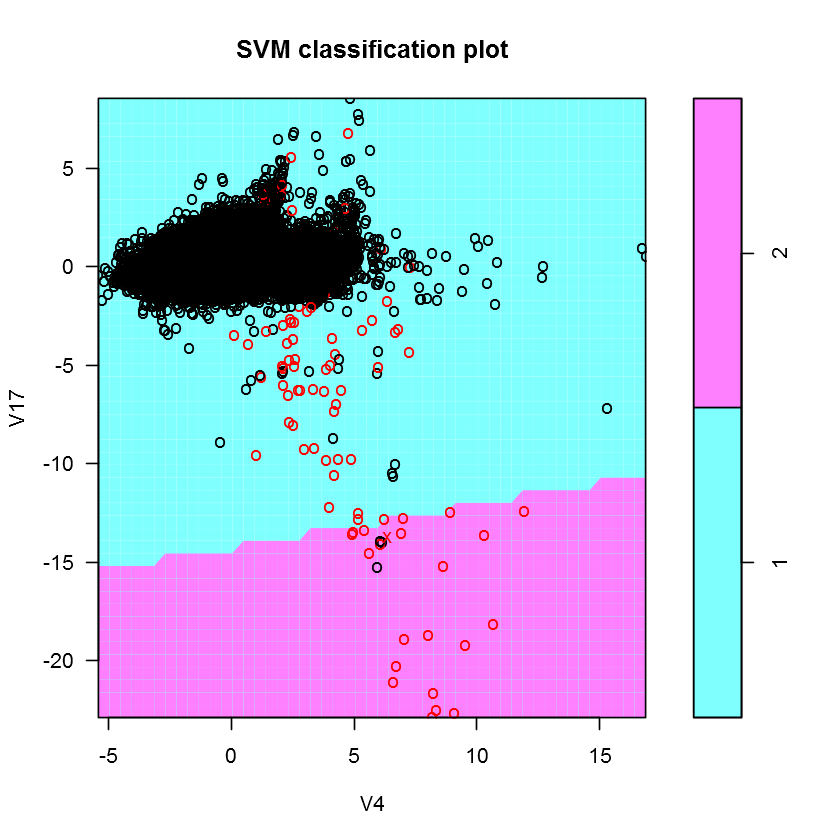

In [112]:
plot(classifier2, test.new, V17 ~ V4)

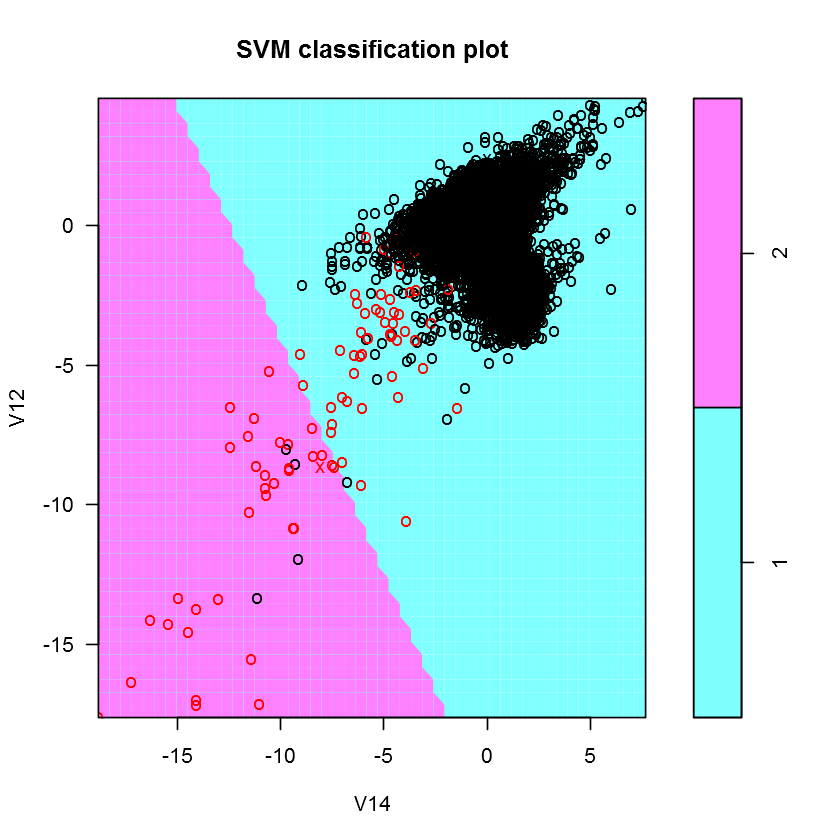

In [113]:
plot(classifier2, test.new, V12 ~ V14)

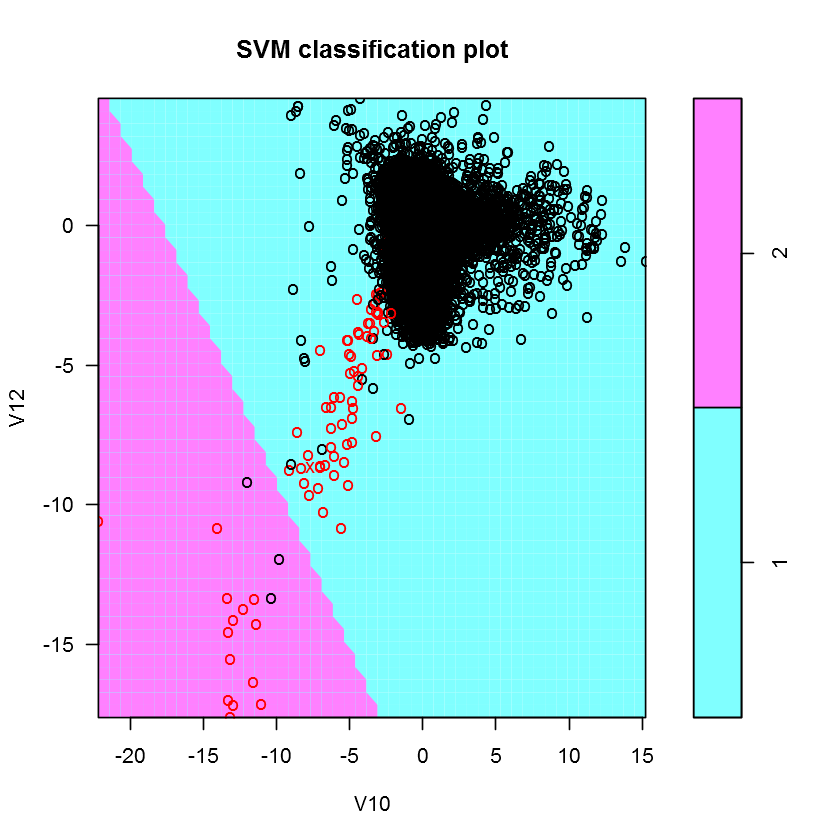

In [114]:
plot(classifier2, test.new, V12 ~ V10)

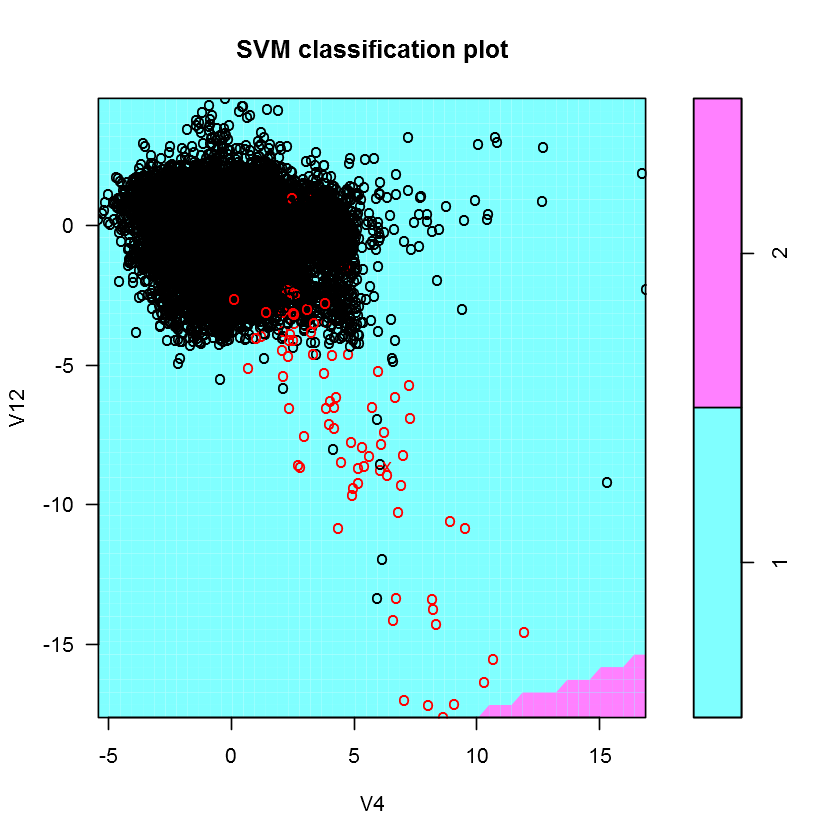

In [115]:
plot(classifier2, test.new, V12 ~ V4)

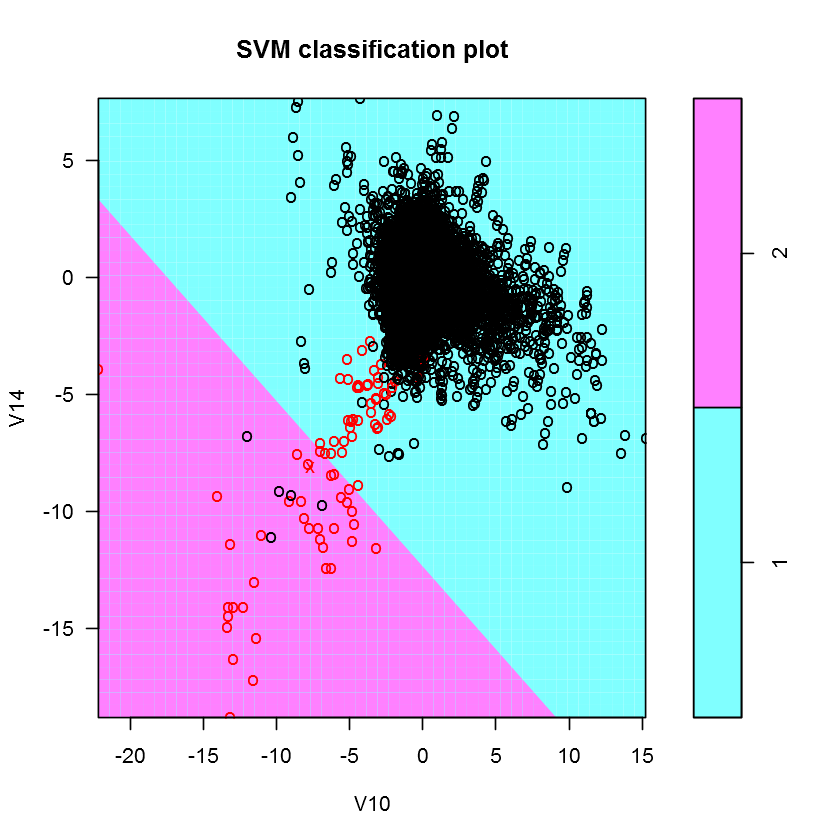

In [116]:
plot(classifier2, test.new, V14 ~ V10)

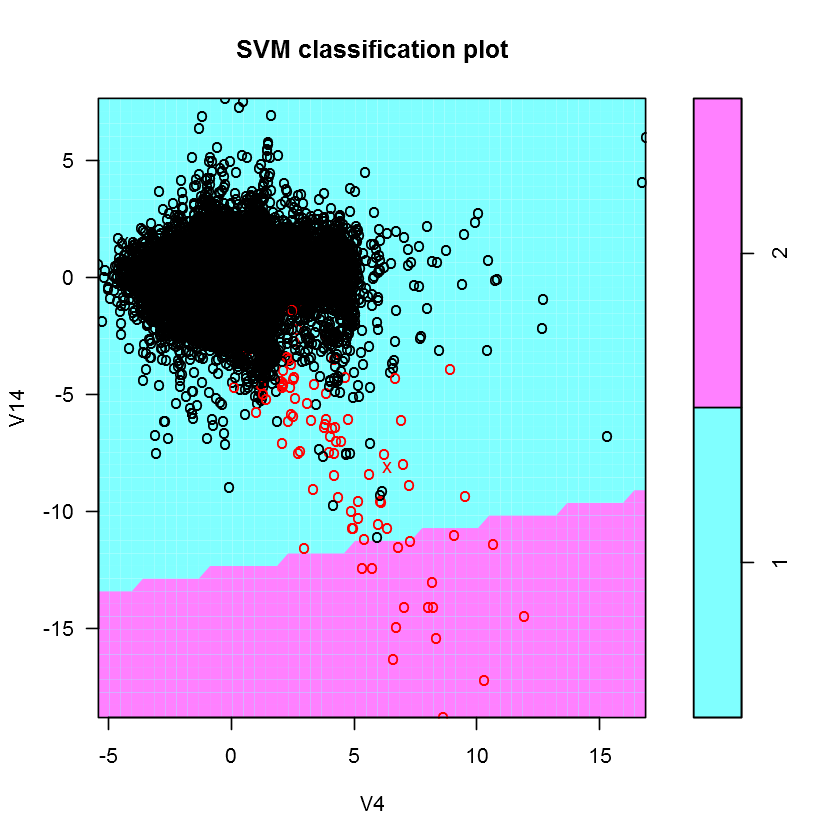

In [117]:
plot(classifier2, test.new, V14 ~ V4)

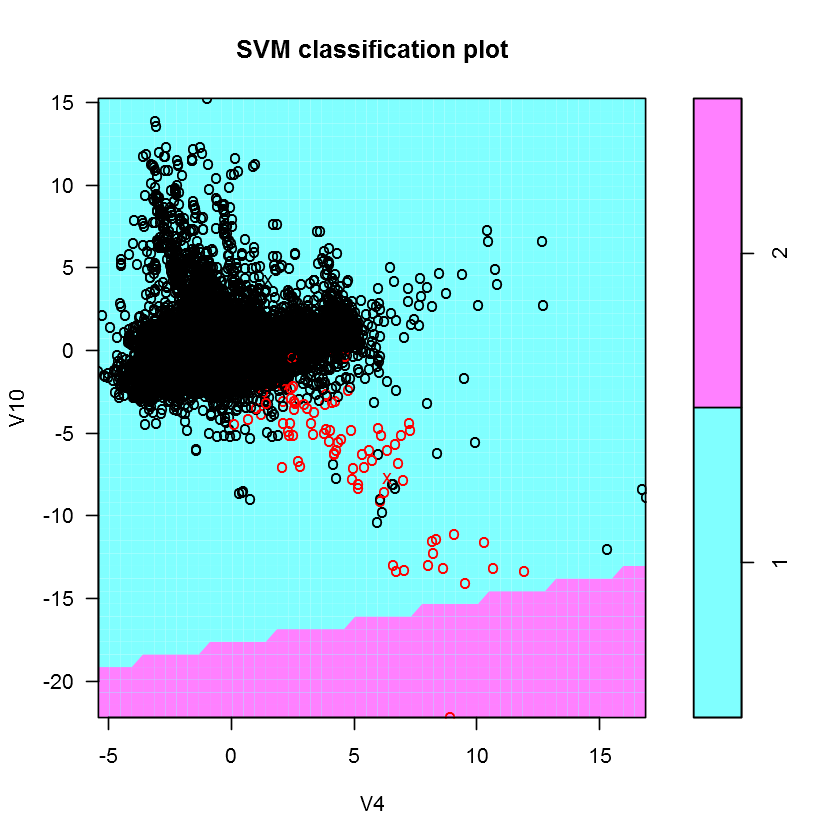

In [118]:
plot(classifier2, test.new, V10 ~ V4)

In [119]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training.it = subset(dataset, split == TRUE)
test.it = subset(dataset, split == FALSE)
summary(training.it$Class)
summary(test.it$Class)

0      1 
227452    394

0     1 
56863    98

In [131]:
classifier3 = svm(formula = Class~V14 + V17 + V10 + V12+V4, data = training.it,
                  type = 'C-classification',
                  kernel = 'linear')
classifier3


Call:
svm(formula = Class ~ V14 + V17 + V10 + V12 + V4, data = training.it, 
    type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.2 

Number of Support Vectors:  432


In [132]:
test_pred3 = predict(classifier3, type = 'response', newdata = test.it[,-30])
# Making Confusion Matrix
cm3 = table(test.it[,30], test_pred3)

cm3

   test_pred3
        0     1
  0 56852    11
  1    28    70

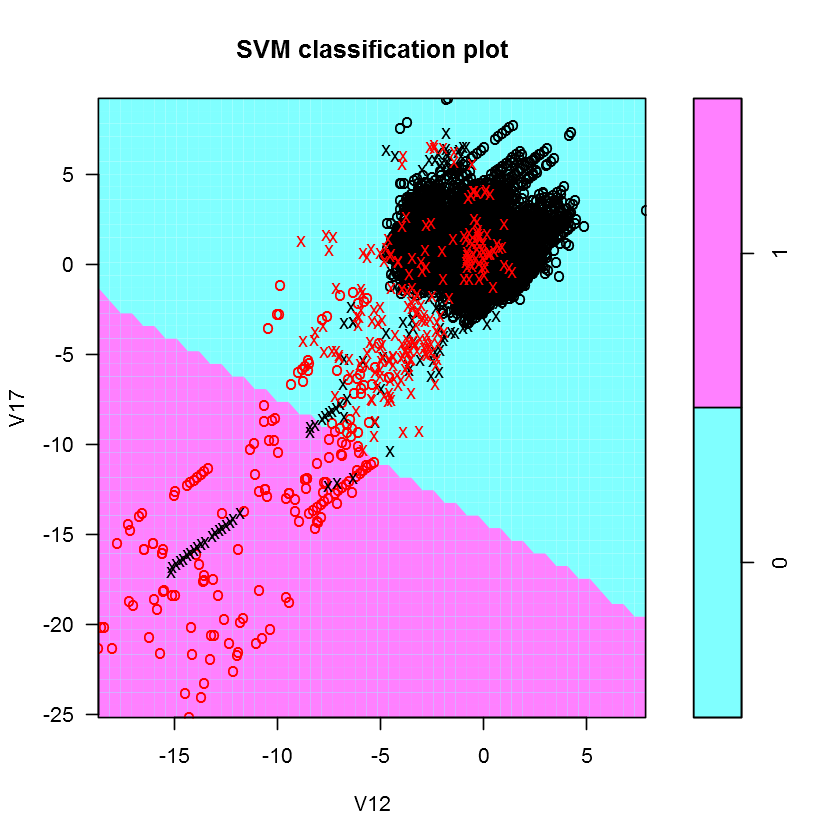

In [133]:
plot(classifier3, training.it, V17 ~ V12)

In [154]:
library('dplyr')
dataset <- mutate(dataset,fra = ifelse(Class == 0 ,"non-fraud","fraud"))
head(dataset)




V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,fra
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.0058237931,1,fraud
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,0.0001047053,1,fraud
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,0.0147389219,1,fraud
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.0048071010,1,fraud
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,0.0027242834,1,fraud
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,0.0001428507,1,fraud


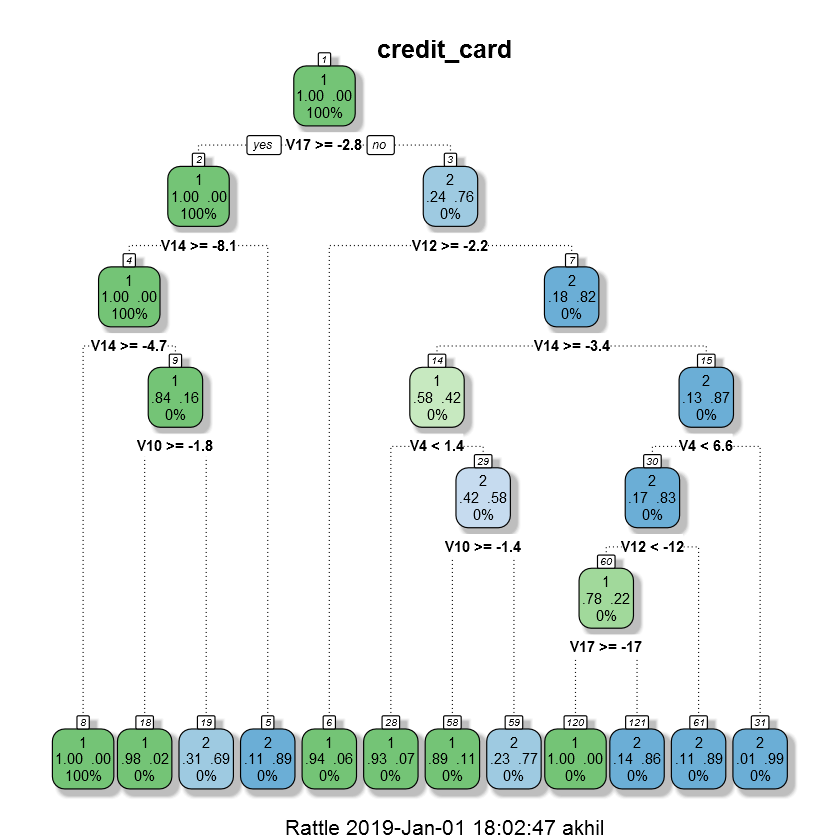

In [157]:
# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Class ~ V17+V14+V10+V12+V4, data=dataset, method="class",)

# plot decision tree
fancyRpartPlot(rpart, main="credit_card")